# Matplotlib

Matplotlib is a powerful package (and now de standard) for plotting in both 2D and 3D in Python. In this notebook we will learn the basics on how to plot with matplotlib. (This is based on the Scipy tutorial, and the Introduction to Scientific Computing with Python by Johansson)

> NOTE : the pylab mode for ipython is designed to expose the numpy and matplotlib namespace, making easier to use the environment. But, it is recommended to keep the modules names isolated, so we will try to use the pyplot submodule as possible. To use pylab, you can start ipython with the `--pylab` flag.

> NOTE : We want to produce inline figures inside the notebook. Therefeore, we use the following magic function

In [1]:
%matplotlib inline

## A simple example
Let's start plotting by using a simple example with the defaults.

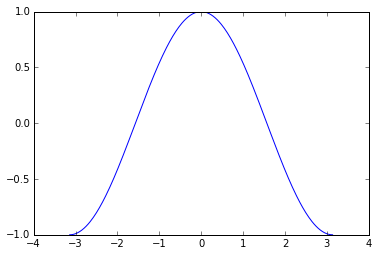

In [2]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C= np.cos(X)
plt.plot(X, C)
plt.show() # not necessarily needed

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

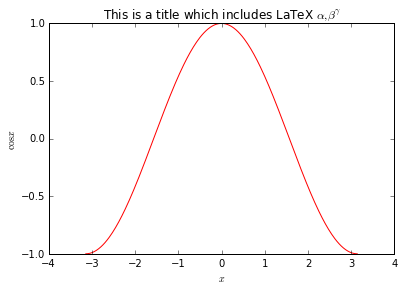

In [7]:
# The object oriented way
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(X, C, 'r')
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$\cos x$')
axes.set_title(r"This is a title which includes LaTeX $\alpha, \beta^\gamma$")

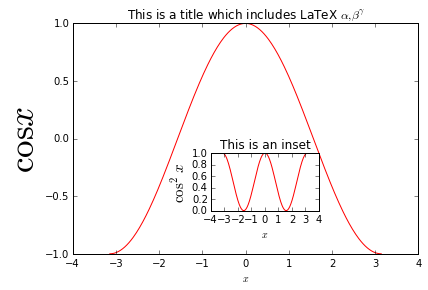

In [19]:
# The object oriented way
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(X, C, 'r')
axes1.set_xlabel(r'$x$')
axes1.set_ylabel(r'$\cos x$', fontsize=35)
axes1.set_title(r"This is a title which includes LaTeX $\alpha, \beta^\gamma$")
axes2 = fig.add_axes([0.42, 0.25, 0.25, 0.2])
axes2.plot(X, C*C, 'r')
axes2.set_xlabel(r'$x$')
axes2.set_ylabel(r'$\cos^2 x$', fontsize=15)
axes2.set_title(r"This is an inset")

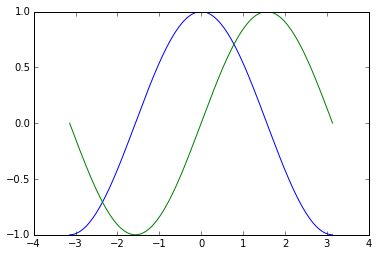

In [21]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.show() # not necessarily needed

As you can see, there are several defaults employed: the type of data plotting (lines), the color (blue and then green), the axis sizes, no labels, no legends, etc. Now let's start modifying some settings.

### Changing colors, widths, and adding legends

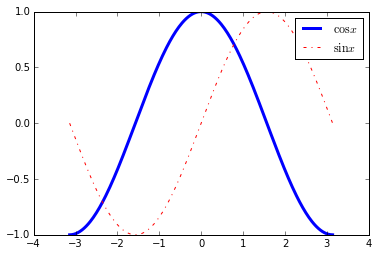

In [26]:
plt.plot(X, C, color='blue', linewidth=3.0, linestyle='-', label=r"$\cos x$") # linewidth -> lw , linestyle -> ls
plt.plot(X, S, color='red',  lw=1.0, ls='-.', label=r"$\sin x$")
plt.legend() # there are several codes for different locations. Search on google.

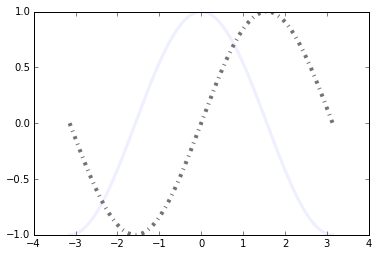

In [27]:
plt.plot(X, C, color='#eeefff', lw=3.0, ls='-') # html string
plt.plot(X, S, color='0.45',  lw=4.0, ls='-.') # gray scale

There are more standard color : red, cyan, magenta, yellow, black, white. Actually, matplotlib can use a full range of html colors and even more! Check [Matplotlib colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors).

> __Exercise__: Re-plot the previous data with several different colors and palettes. Share your plots with your classmates. 

### Changing the figure size and resolution

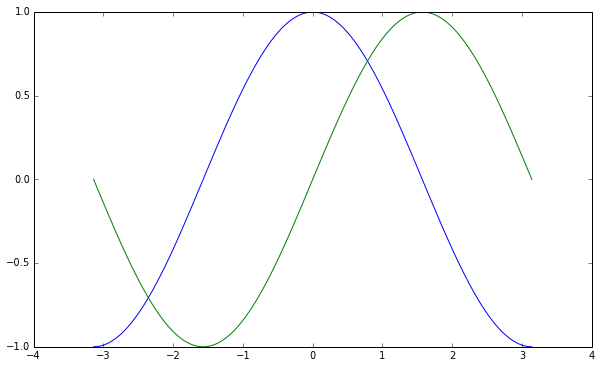

In [29]:
plt.figure(figsize=(10, 6), dpi=60)
plt.plot(X, C)
plt.plot(X, S)
plt.show()

## Saving the figure to a filename
You can save your plots into filename with suitable formats. It is recommended for you to use the vector graphics formats, like svg, pdf, or pdf, and to avoid bitmap formats. If you must have a bitmap, select the png format with a good dpi. 

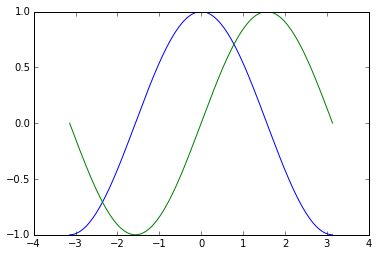

In [40]:
plt.plot(X, C)
plt.plot(X, S)
plt.savefig("filename.pdf", dpi=200)

## Setting limits

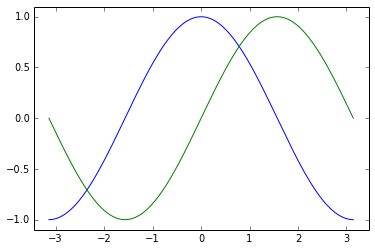

In [30]:
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.plot(X, C)
plt.plot(X, S)

### Setting tics 

Let's change the xtics to show $\pi$ related values, which are more intereting.

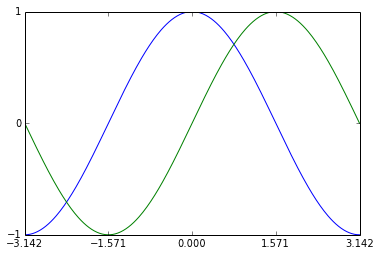

In [32]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, 1])
plt.plot(X, C)
plt.plot(X, S)

### Setting tics labels
Instead of `-3.142`, it woul be better to have the symbol $\pi$, right?

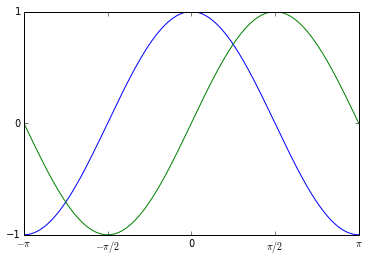

In [39]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
plt.yticks([-1, 0, 1])
plt.plot(X, C)
plt.plot(X, S)

## Figures
A figure, in matplotlib, means the whole window. Therefire, you can have several plots (subplots) on a single figure (window). For this we will need to explicitly use figures and axes, in constrast with the majority of the examples previosuly shown. Remember that the function `gca()` returns the current axes, while `gcf()` returns the current figure.

Figures are numbered starting from __1 !__ . 

> __Exercise__: Please check the documentation explain the following parameters for a figure: `num, figsize, dpi, facecolor, edgecolor, frameon`.  

You can use `plt.close()` to close a figure programatically.

## Subplots
Subplots are a way to organize several plots on a figure, using a grid. You have to specify the rows and columns. For more complex grids, you can use the gridspec command.

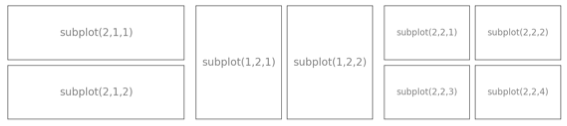

In [96]:
from IPython.core.display import Image 
Image(filename='subplots.png')

## Manipulating several plots 

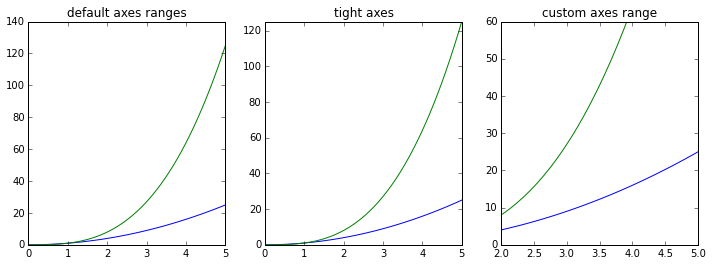

In [51]:
x = np.linspace(0, 5)
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 
axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")
axes[1].plot(x, x**2, x, x**3)
axes[1].axis("tight")
axes[1].set_title("tight axes")
axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## Logarithmic scale

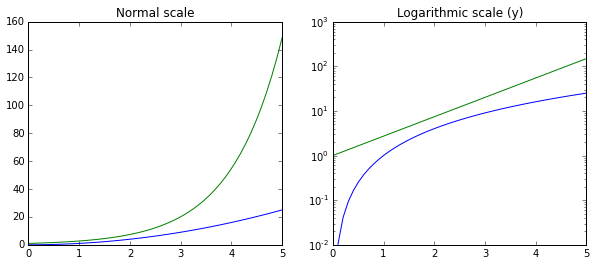

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10,4)) 
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")
axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

## Other plotting styles

In [55]:
n = np.array([0,1,2,3,4,5])

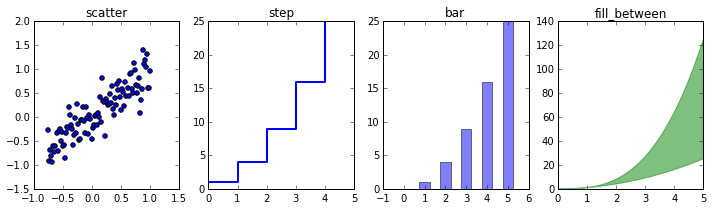

In [62]:
xx = np.linspace(-0.75, 1., 100)
fig, axes = plt.subplots(1, 4, figsize=(12,3)) 
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

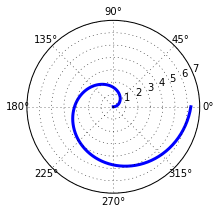

In [66]:
# polar plot using add_axes and polar projection 
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color="blue", lw=3);

## 3D figures

In [77]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100) 
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

In [78]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

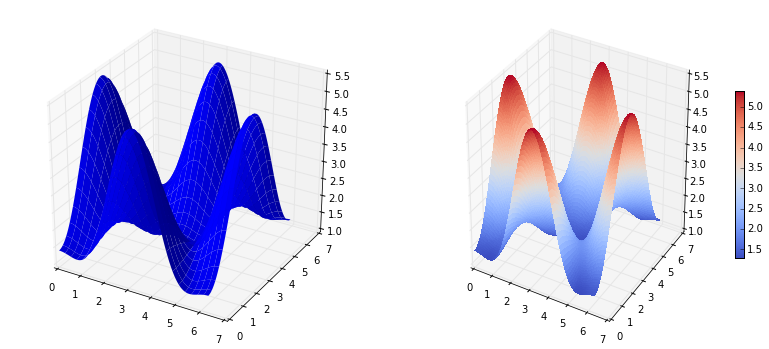

In [80]:
fig = plt.figure(figsize=(14,6))
# ‘ax‘ is a 3D-aware axis instance because of the projection=’3d’ keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

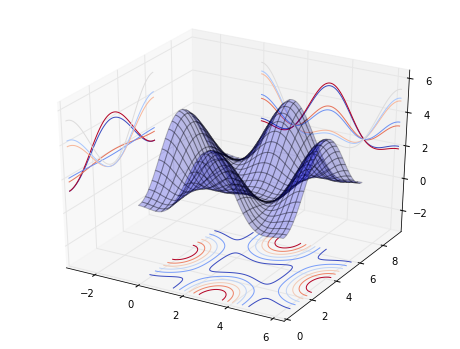

In [82]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)
ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Animations
To create animations, you can use the ```FuncAnimation``` function which can generate a movie of files from sequences of figures. You have to define an init function, which starts the animation sequence, and an update function, which updates the canvas. The general structure is

In [83]:
def init():
    # setup figure
    
def update(frame_counter):
    # update figure for new frame
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

anim.save("animation.mp4", fps=30) # fps = frames per second

IndentationError: expected an indented block (<ipython-input-83-e3a1ffe5ed9e>, line 4)

In [98]:
from matplotlib import animation
from numpy import pi, sin, cos

# double pendulum
from scipy.integrate import odeint
g = 9.82; L = 0.5; m = 0.1
def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0] # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t) # solve the ODE 

In [101]:
fig, ax = plt.subplots(figsize=(5,5)) 
ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])
pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n):
    # n = frame counter
    # calculate the positions of the pendulums 
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)
# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders #anim.save(’animation.mp4’, fps=20, extra_args=[’-vcodec’, ’libx264’], writer=animation.FFMpegWriter()) #anim.save(’animation.mp4’, fps=20, extra_args=[’-vcodec’, ’libx264’])
#anim.save("animation.mp4", fps=20, writer="ffmpeg", codec="libx264")
#anim.save("animation.mp4", fps=20, writer="avconv", codec="libx264")
anim.save("animation.mp4", fps=20)
plt.close(fig)

***
## Exercises

By using the codes below and by reading the documentation, try to reproduce the associated figure.

### Regular plot
Hint : Check the command `fill_between`

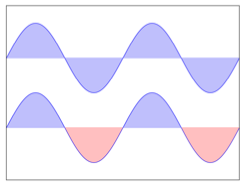

In [97]:
Image("ex-01-regular.png")

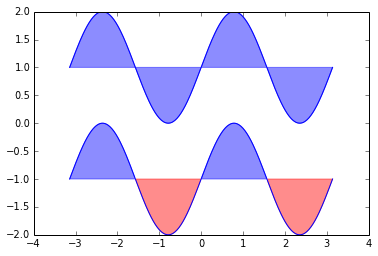

In [17]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)
plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, 1.0, Y+1, color='blue', alpha=0.45)
plt.fill_between(X, -1.0, Y-1, Y-1>-1, color='blue', alpha=0.45)
plt.fill_between(X, -1.0, Y-1, Y-1<-1, color='red', alpha=0.45)

### Scatter Plot 
Hint: Color is given by angle of (X, Y). Take care of marker size, color, and transparency.

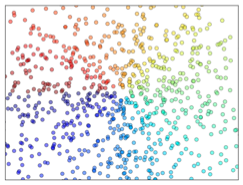

In [100]:
Image('ex-02-scatter.png')

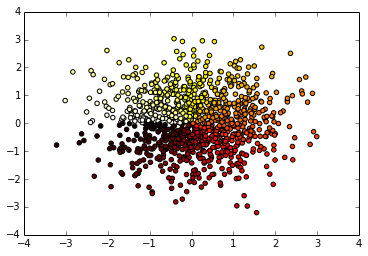

In [19]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y, X)
plt.scatter(X,Y, c = T, cmap='hot')

### Bar plots
Take care of text alingment. Add text for red bars.

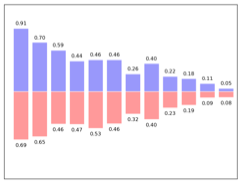

In [103]:
Image("ex-03-bars.png")

(-1.25, 1.25)

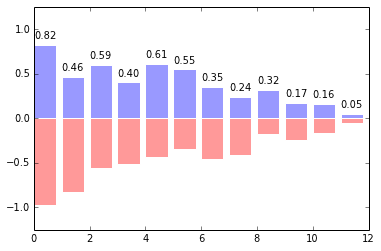

In [109]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')
plt.ylim(-1.25, +1.25)

### Contour plots
Use the `clabel` command. You need to check the appropiate colormap.

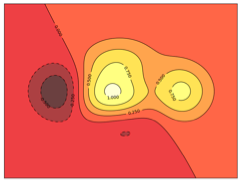

In [110]:
Image("ex-04-contour.png")

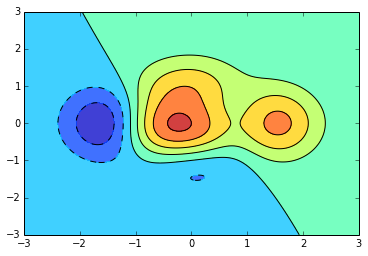

In [125]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

### imshow
You need to take care of the origin of the image in the imshow command and use te appropriate colorbar

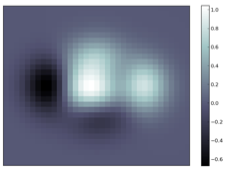

In [127]:
Image("ex-05-imshow.png")

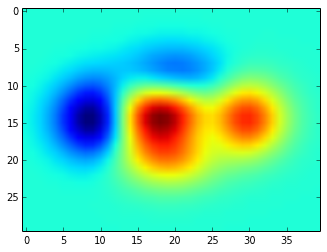

In [130]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))

### Pie chart
Hint: Modify Z. 

Take care of colors and slices.

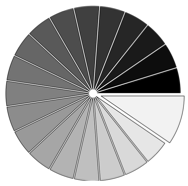

In [132]:
Image("ex-06-pie.png")

([<matplotlib.patches.Wedge at 0x111a04450>,
  <matplotlib.text.Text at 0x111cab1d0>])

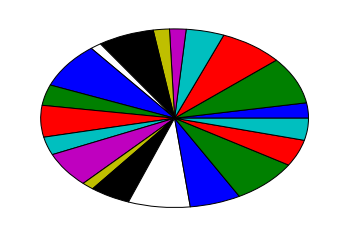

In [135]:
Z = np.random.uniform(0, 1, 20)
plt.pie(Z)

### Quiver
Hint: You need to draw arrows twice

Take care of colors an orientations.

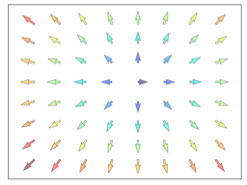

In [136]:
Image("ex-07-quiver.png")

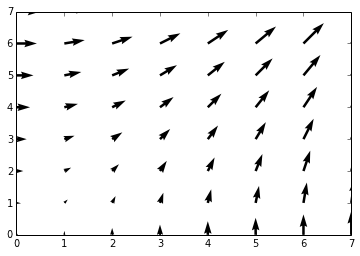

In [137]:
n=8
X, Y = np.mgrid[0:n, 0:n] 
plt.quiver(X, Y)

### Grids
Take care of linestyles

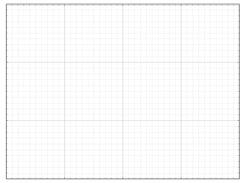

In [138]:
Image("ex-08-grid.png")

[]

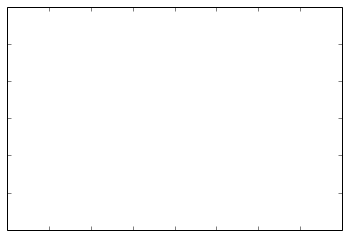

In [139]:
axes = plt.gca()
axes.set_xlim(0, 4)
axes.set_ylim(0, 3)
axes.set_xticklabels([])
axes.set_yticklabels([])

### Multiplots
Hint: You can use several subplots with different partitions

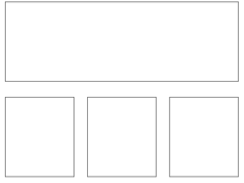

In [140]:
Image("ex-09-multiplots.png")

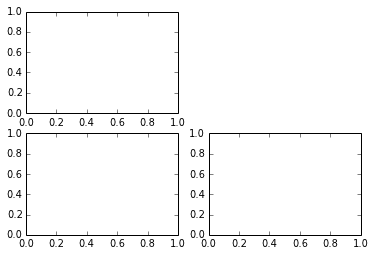

In [143]:
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

### Polar plots
Hint: You only need to modify the `axes` line.

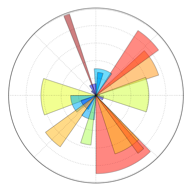

In [144]:
Image("ex-10-polar.png")

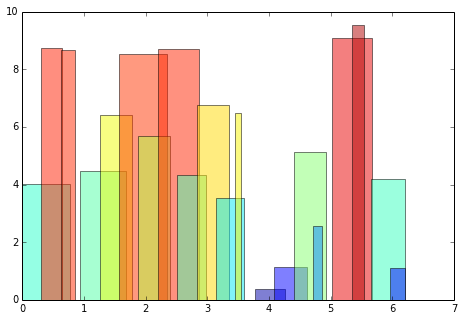

In [146]:
plt.axes([0, 0, 1, 1])
N = 20
theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)
for r, bar in zip(radii, bars): 
    bar.set_facecolor(cm.jet(r / 10.)) 
    bar.set_alpha(0.5)

### 3D Plots
Hint : You need to use `contourf`

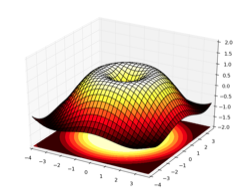

In [147]:
Image("ex-11-3d.png")

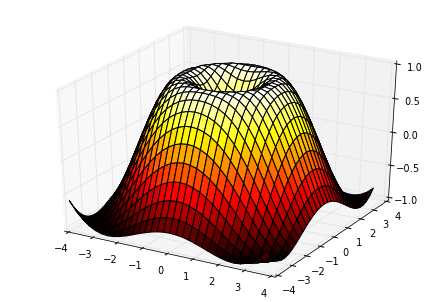

In [148]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

## Making an animation
There are several ways to make an animation. One can, for example, print several copies of the figure at different times and then enconde them in a video. Or make just a live animation in the notebook, without storing it. Let's do the later [REF](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/05_Animations.ipynb):

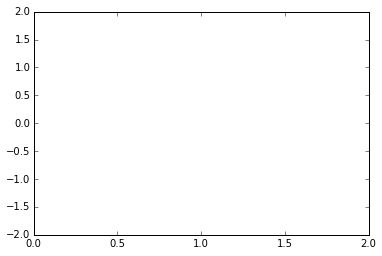

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

In [42]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [43]:
# animation function.  This is called sequentially
x = np.linspace(0, 2, 1000)

def animate(i):
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

In [44]:
from matplotlib import animation

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [45]:
anim.save('basic_animation.mp4', fps=30)

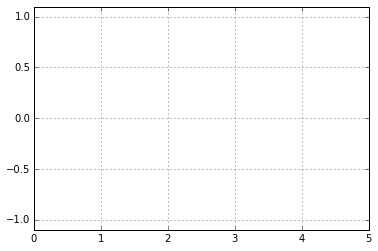

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()